In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd


In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)


In [8]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

id
station
date
prcp
tobs


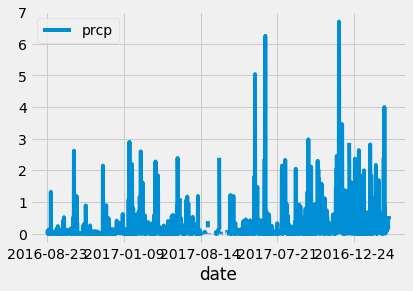

In [74]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#print columns
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'])
#find that the closest date is 2017/08/23
session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()
#create a dataframe with one year of info
df = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_data = pd.DataFrame(df, columns=['date','prcp'])
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_data.plot('date','prcp')


In [75]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [81]:
# Design a query to show how many stations are available in this dataset?
#find column names 
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'])
    #Number of stations
totalstations= session.query(Measurement.station).count()
totalstations

id
station
name
latitude
longitude
elevation


9

In [121]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
x = session.query(Measurement.station,Measurement.id).all()
stations =  pd.DataFrame(x, columns = ["id","stations"])
station_activity = stations.groupby("id").count()
station_activity.sort_values('stations', ascending = False, inplace = True)
station_activity.reset_index()

,id,stations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [129]:
x = session.query(Station.station,Station.name).all()
statact = pd.DataFrame(x, columns = ["id","name"])
statact


,id,name
0,USC00519397,"WAIKIKI 717.2, HI US"
1,USC00513117,"KANEOHE 838.1, HI US"
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,USC00517948,"PEARL CITY, HI US"
4,USC00518838,"UPPER WAHIAWA 874.3, HI US"
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"
6,USC00519281,"WAIHEE 837.5, HI US"
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US"
8,USC00516128,"MANOA LYON ARBO 785.2, HI US"


In [130]:
#Merge the two dataframes to 
y = pd.merge(station_activity, statact, on = "id")
y
#Waihee has the most observations

,id,stations,name
0,USC00519281,2772,"WAIHEE 837.5, HI US"
1,USC00519397,2724,"WAIKIKI 717.2, HI US"
2,USC00513117,2709,"KANEOHE 838.1, HI US"
3,USC00519523,2669,"WAIMANALO EXPERIMENTAL FARM, HI US"
4,USC00516128,2612,"MANOA LYON ARBO 785.2, HI US"
5,USC00514830,2202,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
6,USC00511918,1979,"HONOLULU OBSERVATORY 702.2, HI US"
7,USC00517948,1372,"PEARL CITY, HI US"
8,USC00518838,511,"UPPER WAHIAWA 874.3, HI US"


In [175]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
df = session.query(Measurement.date, Measurement.tobs, Measurement.station).filter(Measurement.date >= "2016-08-23").filter(Measurement.station == "USC00519281").all()
#Create a dataframe for the station with the highest number of observations
temperature_stat =  pd.DataFrame(df, columns = ["date","temp", "station_id"])
min_temp = temperature_stat.sort_values('temp', ascending = True).reset_index()
max_temp = temperature_stat.sort_values('temp', ascending = False).reset_index()
avg_temp = temperature_stat['temp'].mean()
#Set up dummy variables for my minimum and maximum 
y = min_temp['temp'][0]
x =max_temp['temp'][0]
print(f'The minimum temperature of Waihee is: {y} ')
print(f'The maximum temperature of Waihee is: {x} ')
print(f'The average temperature of Waihee is: {avg_temp}')

The minimum temperature of Waihee is: 59.0 
The maximum temperature of Waihee is: 83.0 
The average temperature of Waihee is: 73.10795454545455


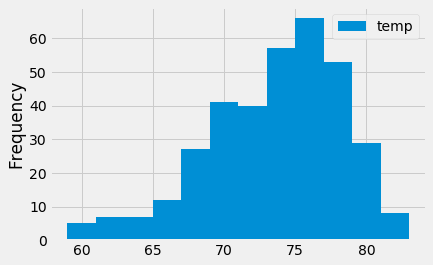

In [177]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_stat.plot.hist(bins=12)